<a href="https://colab.research.google.com/github/itsabhiii8/crop-yield-prediction/blob/main/crop_yield_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('crop_yield.csv')

In [ ]:
df.shape

(19689, 10)

In [ ]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.drop('Crop_Year',axis=1,inplace=True)

In [ ]:
df.head()

,Crop,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


<Axes: >

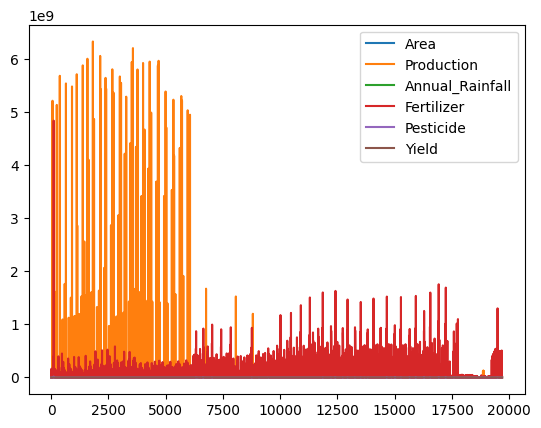

In [ ]:
df.plot()

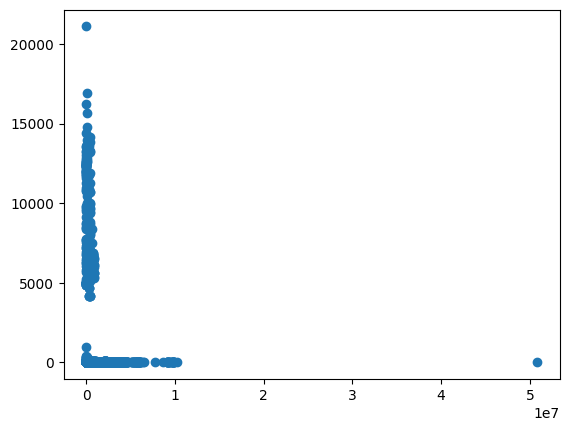

In [ ]:
plt.scatter(df['Area'],df['Yield'])

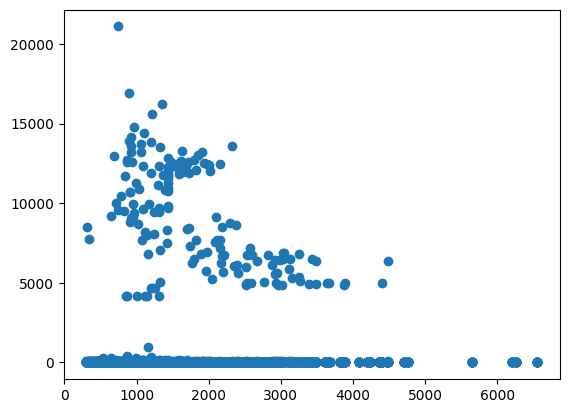

In [ ]:
plt.scatter(df['Annual_Rainfall'],df['Yield'])

In [ ]:

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['Yield']),df['Yield'],test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15751, 8), (3938, 8), (15751,), (3938,))

In [ ]:
y_train.sample(10)


,Yield
6775,1.302857
5027,0.293750
19085,0.976875
6364,1.503684
62,1.245714
12527,0.681892
11772,0.522000
1099,1.152273
4326,3.000000
11083,0.429500


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [ ]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['State','Season','Crop']),
    ('tnf2',StandardScaler(),['Area','Annual_Rainfall','Production','Fertilizer',   'Pesticide'])
],remainder='passthrough')

In [ ]:
x_train_transformed=transformer.fit_transform(X_train)
x_train_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.06301582,
        -0.2499613 , -0.22350624],
       [ 0.        ,  0.        ,  0.        , ..., -0.063019  ,
        -0.2504743 , -0.22398548],
       [ 0.        ,  0.        ,  0.        , ..., -0.06301943,
        -0.25035434, -0.22379036],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.06242865,
        -0.22378775, -0.19561066],
       [ 0.        ,  0.        ,  0.        , ..., -0.06295764,
        -0.22764315, -0.1983694 ],
       [ 0.        ,  0.        ,  0.        , ..., -0.06301629,
        -0.24619839, -0.21939285]])

In [ ]:
x_test_transformed=transformer.transform(X_test)
x_test_transformed

array([[ 0.        ,  0.        ,  0.        , ..., -0.06301586,
        -0.25024584, -0.22370693],
       [ 0.        ,  0.        ,  0.        , ..., -0.06298018,
        -0.24153593, -0.21392654],
       [ 0.        ,  0.        ,  0.        , ..., -0.06285028,
        -0.24056695, -0.21398791],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.06274464,
        -0.19871798, -0.17984341],
       [ 0.        ,  0.        ,  0.        , ..., -0.06292744,
        -0.19908553, -0.17233451],
       [ 0.        ,  0.        ,  0.        , ..., -0.06285568,
        -0.08632323, -0.09757399]])

In [ ]:
x_train_transformed=pd.DataFrame(x_train_transformed)
x_test_transformed=pd.DataFrame(x_test_transformed)

In [ ]:
x_train_transformed

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.239400,2.338277,-0.063016,-0.249961,-0.223506
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.239772,-0.928899,-0.063019,-0.250474,-0.223985
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.239601,-0.676275,-0.063019,-0.250354,-0.223790
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.212104,-0.180597,-0.062924,-0.217836,-0.192572
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.488643,-0.777619,-0.061559,0.288132,0.401437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.207302,-1.041408,-0.062783,-0.210938,-0.205025
15747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.217148,-0.415430,-0.062695,-0.221096,-0.205312
15748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.218086,-0.568919,-0.062429,-0.223788,-0.195611
15749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.211121,-0.529657,-0.062958,-0.227643,-0.198369


In [ ]:
np.round(x_train_transformed.describe(),1)

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
count,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,...,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0,15751.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,0.1,0.2,0.2,0.2,0.1,0.1,0.2,0.2,0.2,0.2,...,0.1,0.1,0.2,0.2,0.1,1.0,1.0,1.0,1.0,1.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.2,-1.4,-0.1,-0.3,-0.2
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.2,-0.6,-0.1,-0.2,-0.2
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.2,-0.2,-0.1,-0.2,-0.2
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.1,0.2,-0.1,-0.1,-0.1
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,66.8,6.3,24.3,49.6,71.1


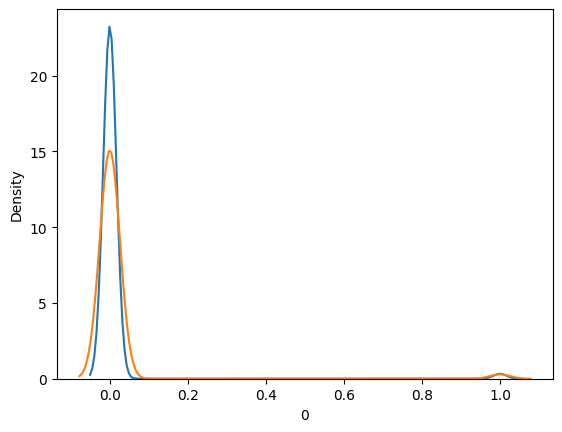

In [ ]:
sns.kdeplot(x_train_transformed[0])
sns.kdeplot(x_test_transformed[0])
plt.show()

In [ ]:
from sklearn.svm import SVR

In [ ]:
classifier=SVR(kernel='linear',C=150)
classifier.fit(x_train_transformed,y_train.ravel())

<ipython-input-25-daeb3ab00b8a>:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  classifier.fit(x_train_transformed,y_train.ravel())


SVR(C=150, kernel='linear')

In [ ]:
y_pred=classifier.predict(x_test_transformed)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score1=r2_score(y_test,y_pred)
score2=mean_absolute_error(y_test,y_pred)
score3=mean_squared_error(y_test,y_pred)

In [ ]:
score1,score2,score3

(0.7659145377017648, 34.49938582444544, 187558.60418880658)

In [ ]:
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

In [ ]:
svr_rbf.fit(x_train_transformed,y_train.ravel())

<ipython-input-30-4fd7be674b0d>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_rbf.fit(x_train_transformed,y_train.ravel())


SVR(C=100, gamma=0.1)

In [ ]:
y_pred_rbf=svr_rbf.predict(x_test_transformed)

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
score1_rbf=r2_score(y_test,y_pred_rbf)
score2_rbf=mean_absolute_error(y_test,y_pred_rbf)
score3_rbf=mean_squared_error(y_test,y_pred_rbf)

In [ ]:
score1_rbf,score2_rbf,score3_rbf

(0.26065335929747335, 64.14227545983141, 592394.0025168081)

In [ ]:
svr_poly.fit(x_train_transformed,y_train.ravel())

<ipython-input-34-ae7bb39a5893>:1: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  svr_poly.fit(x_train_transformed,y_train.ravel())


SVR(C=100, coef0=1, gamma='auto', kernel='poly')

In [ ]:
y_pred_poly=svr_poly.predict(x_test_transformed)

In [ ]:
score1_poly=r2_score(y_test,y_pred_poly)
score2_poly=mean_absolute_error(y_test,y_pred_poly)
score3_poly=mean_squared_error(y_test,y_pred_poly)

In [ ]:
score1_poly,score2_poly,score3_poly

(0.47055205877193584, 47.81836291772021, 424214.7969054874)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result= adfuller(df['Yield'])

In [ ]:
def adfuller_test(Yield):
  result=adfuller(Yield)
  labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))
  if(result[1]<=0.05):
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
  else:
    print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(df['Yield'])

ADF Test Statistic : -20.87575699080966
p-value : 0.0
#Lags Used : 37
Number of Observations Used : 19651
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


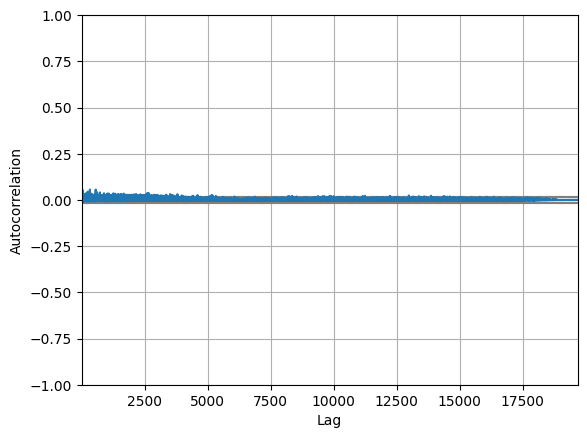

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Yield'])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

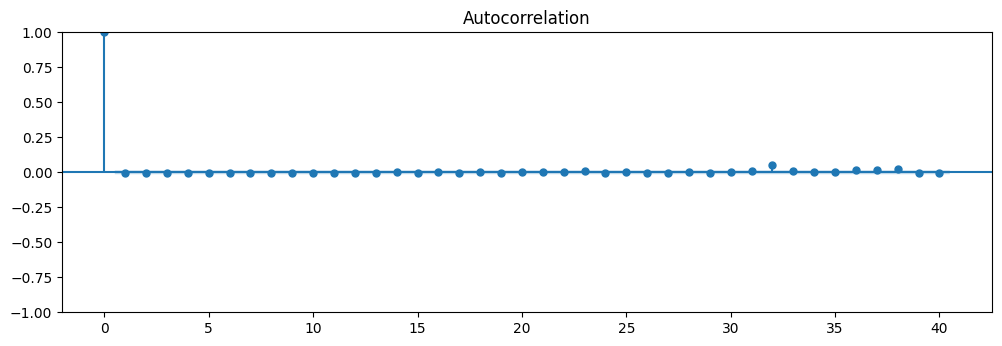

In [ ]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df['Yield'],lags=40,ax=ax1)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['Yield'],order=(1,0,1))
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Yield   No. Observations:                19689
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -161383.576
Date:                Fri, 08 Nov 2024   AIC                         322775.152
Time:                        19:28:58   BIC                         322806.703
Sample:                             0   HQIC                        322785.482
                              - 19689                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         79.9539     23.836      3.354      0.001      33.236     126.671
ar.L1          0.8645      0.250      3.452      0.001       0.374       1.355
ma.L1         -0.8763      0.215     -4.073      0.000      -1.298      -0.455
sigma2      7.701e+05   2949.173    261.139      0.000    7.64e+05    7.76e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):          25770591.95
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            12.78
Prob(H) (two-sided):                  0.00   Kurtosis:                       178.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

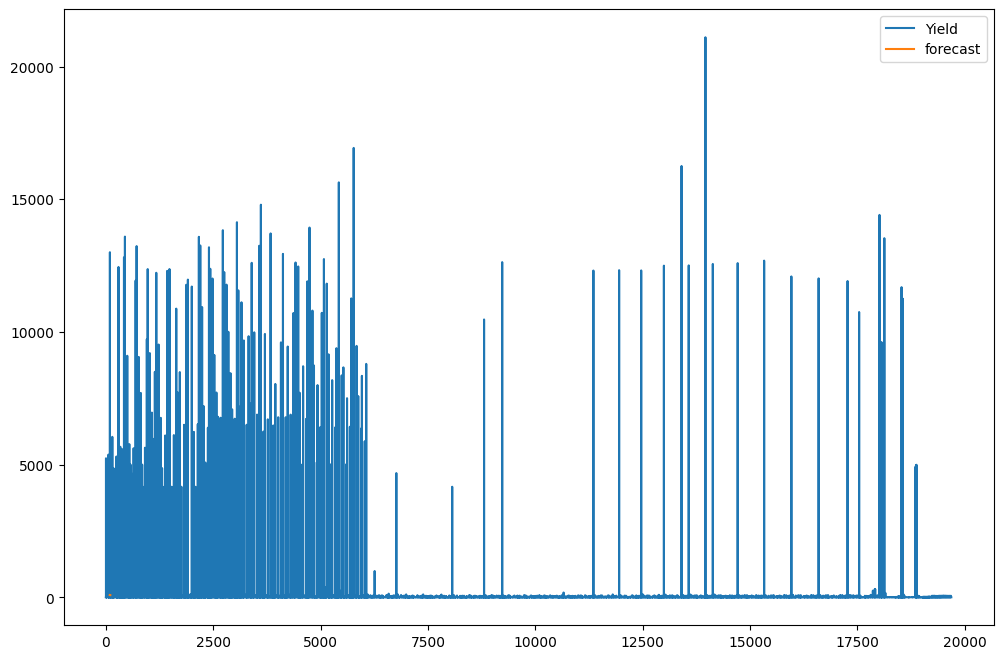

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Yield','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Yield'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<Axes: >

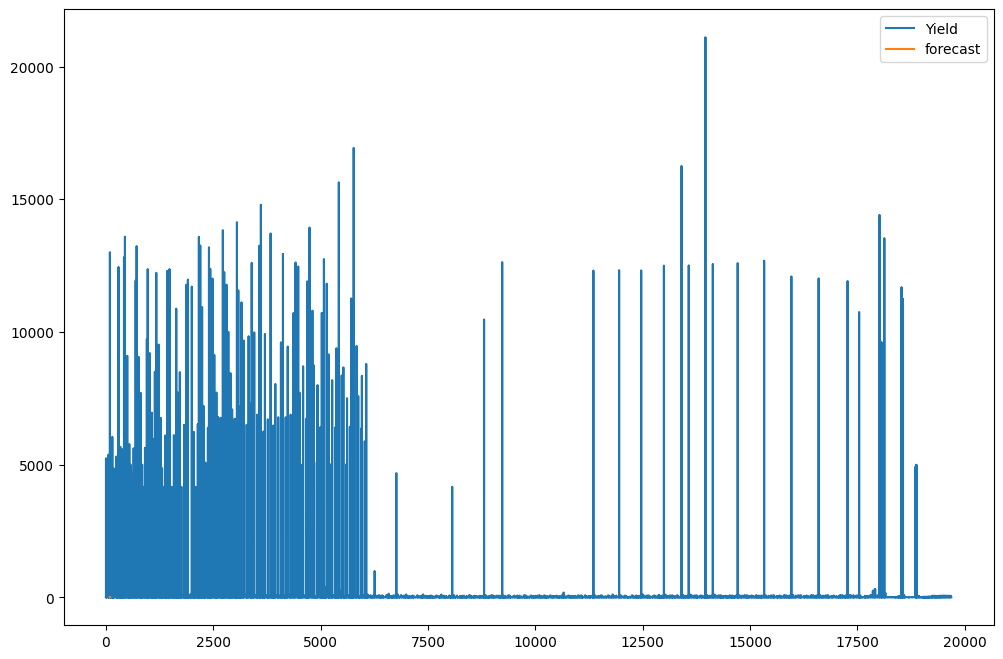

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Yield','forecast']].plot(figsize=(12,8))